In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# To generate the for loops
import glob
import os
from matplotlib import ticker

In [4]:
## READING MICE DATA

# Get the data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

dfs = []
min = []
#k = 0
for file in files:
    #k = k +1
    #if k > 2:
        #break
    df = pd.read_excel(file) # reading the excel file
    
    mice_min = df.iloc[:,0] #getting only the minutes
    mice_temp = df.iloc[:,3::2] # slicing the data for only temperature
    
    min.append(mice_min) # adding minutes into the list
    dfs.append(mice_temp) # adding the file into the list
  
     

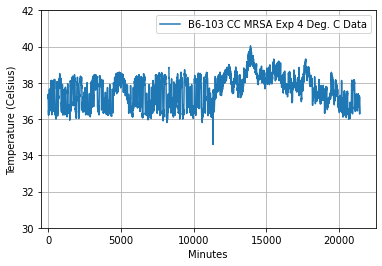

In [23]:
# PLOTTING EACH TIME SERIES
fig,ax = plt.subplots()
fig.set_facecolor("white") # Changing the border to white

# Plotting each file's temperature vs. minutes
for i in range(len(min)):
    mice_min = min[i] # renaming the minutes to the current column
    mice_temp = dfs[i] # renaming the temperature to the current column
    x_axis = mice_min # defining the x axis
    
    # A for loop for the temperatures (extracting only the column of data frame)
    for j in range(mice_temp.shape[1]): 
        ax.cla() # clear axis for each individual mouse
        y_axis = mice_temp.iloc[:,j] # defining the y axis
        names = mice_temp.columns[j] # extracting the names of the columns (mouse name)
        ax.plot(x_axis, y_axis, label=names) # plotting the time series
        ax.grid(True) # adding a grid
        ax.set_xlim(-500,22500,2000)
        ax.set_ylim(30,42,0.5)
        ax.set_xlabel("Minutes") #x label
        ax.set_ylabel("Temperature (Celsius)") #y label
        ax.legend() # name of the mouse
        suffix = str(i).zfill(4)
        #SAVING EACH PLOT
        filename = "Images/%s.png"%names # saving the file as the name of the mouse
        fig.savefig(filename)